# Define the Sine-Gaussian (SG) signal and plot it.

#### Zu-Cheng Chen, Feb 2019

In [1]:
# load packages
using Plots
using FFTW
import LinearAlgebra:norm

## Define the Sine-Gaussian (SG) signal.

In [2]:
"""
SG(dataT, snr, t0, σ, f0, ϕ0) generates a Sine-Gaussian (SG) signal S. 
dataT is the vector of time stamps at which the samples 
of the signal are to be computed. 
snr is the matched filtering signal-to-noise ratio of S,
[t0, σ] determine the Gaussian distribution,
and [f0, ϕ0] are coefficients that parametrize the phase of the signal.
"""
function SGSig(dataT, snr::Real, t0::Real, σ::Real, f0::Real, ϕ0::Real)
    phaseVec = 2π*f0*dataT .+ ϕ0
    sigVec = exp.(-(dataT.-t0).^2/(2*σ^2)) .* sin.(phaseVec)
    sigVec = snr*sigVec/norm(sigVec)
end

# test the function
SGSig(1, 1, 1, 1, 1, 1), SGSig([1,2], 1, 1, 1, 1, 1)

(1.0, [0.85502, 0.518596])

In [3]:
?SGSig

search: SGSig



SG(dataT, snr, t0, σ, f0, ϕ0) generates a Sine-Gaussian (SG) signal S.  dataT is the vector of time stamps at which the samples  of the signal are to be computed.  snr is the matched filtering signal-to-noise ratio of S, [t0, σ] determine the Gaussian distribution, and [f0, ϕ0] are coefficients that parametrize the phase of the signal.


## Plot the signal.

In [4]:
#Set signal parameters.
snr = 10;
t0 = 0.5;
σ = 1;
f0 = 20;
ϕ0 = π;

In [5]:
#Instantaneous frequency after 1 sec.
maxFreq = 2π*f0 + ϕ0;
samplFreq = 5*maxFreq;
samplIntrvl = 1/samplFreq;

In [6]:
#Time samples.
times = collect(0:samplIntrvl:1.0);

# Number of samples
nSamples = length(times);

# Generate the signal.
signals = SGSig(times, snr, t0, σ, f0, ϕ0);

### Plot the signal.

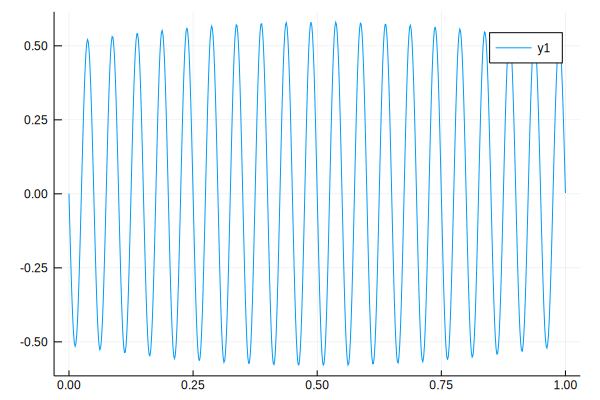

In [7]:
plot(times,signals)

### Plot the periodogram.

In [8]:
# Length of data 
dataLen = times[end]-times[1]

# DFT sample corresponding to Nyquist frequency
kNyq = Int(floor(nSamples/2)+1)

# Positive Fourier frequencies
posFreq = (0:(kNyq-1))*(1/dataLen);

# FFT of signal
fftSig = fft(signals);

# Discard negative frequencies
fftSig = fftSig[1:kNyq];

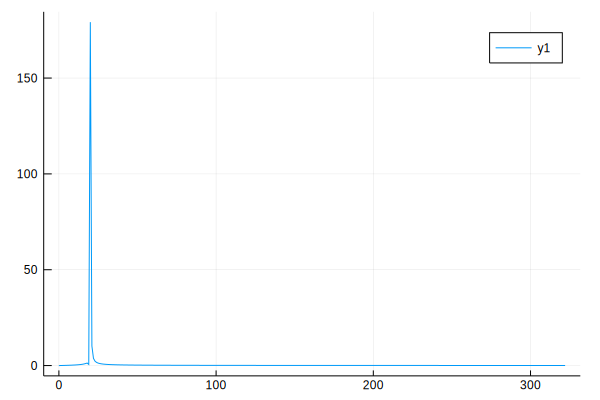

In [9]:
# Plot periodogram
plot(posFreq,abs.(fftSig))